## 5. Global Sequence Alignment (Done)


## 💡 What's the Goal?
We want to line up two sequences (like `ATGCGTACCTAGTGCATGCA` and `CGTACGTACGTACGTAGC5`) to find the best match between them — from start to end. We find this by usinga scoring system to fill out a matrix.

## Scoring System
We give:
- **+1 point** for a match
- **-1 point** for a mismatch
- **-2 points** for a gap (space)

In [16]:
# STEP 1: SETUP

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Score settings
match = 1
mismatch = -1
gap = -2

In [17]:
# Jupyter Notebook Cell 4: Scoring function
def score(a, b):
    return match if a == b else mismatch

In [18]:
# Jupyter Notebook Cell 5: Needleman-Wunsch Algorithm
def needleman_wunsch(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m+1, n+1), dtype=int)

    # Initialize first row and column
    for i in range(1, m+1):
        dp[i][0] = dp[i-1][0] + gap
    for j in range(1, n+1):
        dp[0][j] = dp[0][j-1] + gap

    # Fill the matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            match_score = dp[i-1][j-1] + score(seq1[i-1], seq2[j-1])
            delete = dp[i-1][j] + gap
            insert = dp[i][j-1] + gap
            dp[i][j] = max(match_score, delete, insert)

    return dp


In [19]:
# Jupyter Notebook Cell 6: Step-by-step visualization

def show_matrix(dp, seq1, seq2):
    seq1 = '-' + seq1
    seq2 = '-' + seq2

    # Create DataFrame with proper headers
    df = pd.DataFrame(dp, index=[c for c in seq1], columns=[c for c in seq2])

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(df, annot=True, fmt='d', cmap="YlOrRd", cbar=False)

    # Move x-tick labels to top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')  # Also move the label
    ax.set_xlabel("Sequence 2 (Top)")
    ax.set_ylabel("Sequence 1 (Side)")

    # Adjust ticks
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)

    # Adjust title position above all
    plt.title("Local Alignment Score Matrix", pad=40)

    plt.tight_layout()
    plt.show()


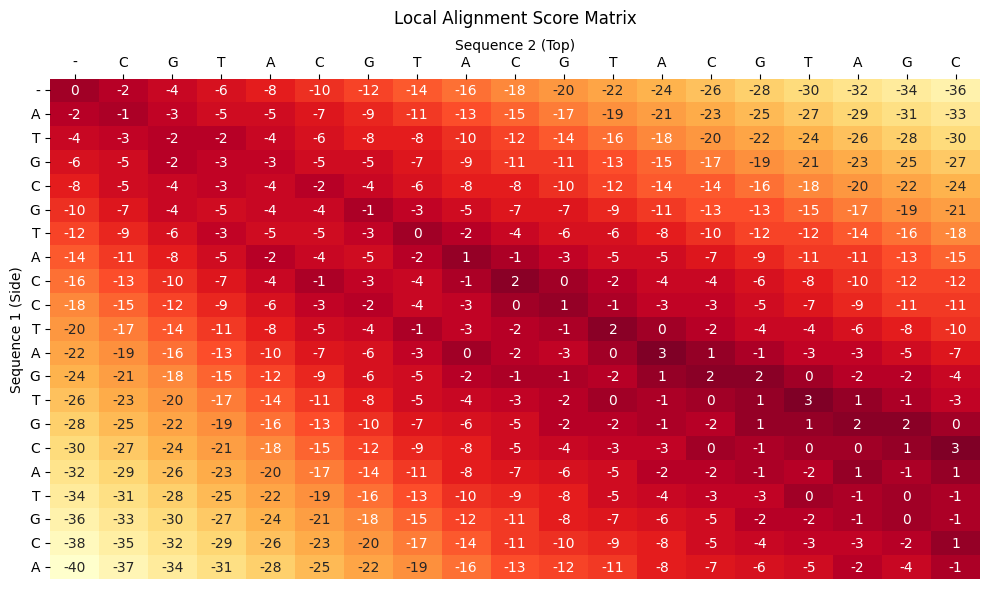

In [20]:
# Jupyter Notebook Cell 7: Try it Out!
seq1 = "ATGCGTACCTAGTGCATGCA"
seq2 = "CGTACGTACGTACGTAGC"

dp_matrix = needleman_wunsch(seq1, seq2)
show_matrix(dp_matrix, seq1, seq2)


## 🔄 Traceback: Finding the Best Alignment

Now that we have filled the scoring matrix, we want to find the **best alignment** of the two sequences.

To do that, we **trace back** from the **bottom-right corner** of the matrix to the **top-left corner**.

### ✅ Rules for Traceback:
At each cell, we ask:
1. **Did we come from a diagonal?**
   - This means we matched or mismatched two letters.
2. **Did we come from the left?**
   - This means we inserted a gap in the first sequence.
3. **Did we come from above?**
   - This means we inserted a gap in the second sequence.

We keep moving until we reach the top-left of the matrix.

### 🎯 Goal:
We build two new sequences with:
- Letters from the original sequences
- Gaps (`-`) where insertions/deletions happened

This gives us the best possible **global alignment**!



In [21]:
# Jupyter Notebook Cell 8: Traceback to Show Aligned Sequences
def traceback(dp, seq1, seq2):
    aligned1 = ""
    aligned2 = ""
    i, j = len(seq1), len(seq2)

    while i > 0 or j > 0:
        current = dp[i][j]
        if i > 0 and j > 0 and current == dp[i-1][j-1] + score(seq1[i-1], seq2[j-1]):
            aligned1 = seq1[i-1] + aligned1
            aligned2 = seq2[j-1] + aligned2
            i -= 1
            j -= 1
        elif i > 0 and current == dp[i-1][j] + gap:
            aligned1 = seq1[i-1] + aligned1
            aligned2 = "-" + aligned2
            i -= 1
        else:
            aligned1 = "-" + aligned1
            aligned2 = seq2[j-1] + aligned2
            j -= 1

    return aligned1, aligned2


In [22]:
# Jupyter Notebook Cell 9: Show Final Result
aligned1, aligned2 = traceback(dp_matrix, seq1, seq2)

print("🔬 Final Alignment:\n")
print(aligned1)
print(aligned2)


🔬 Final Alignment:

-ATGCGTACCTAGTGCATGCA
CGTACGTACGTA-CGTA-GC-


# Jupyter Notebook Cell 10: Summary

## ✅ What Did We Learn?
- We learned how to align two sequences using the **Needleman-Wunsch algorithm**.
- We visualized how scores are calculated in a matrix.
- We traced back to get the **best global alignment**!

This is useful for comparing DNA, proteins, or any kind of strings!